In [190]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
%matplotlib inline
import timeit



In [191]:
csv_path="../Data/survey_lung_cancer.csv"
df=pd.read_csv(csv_path,sep=';')

In [192]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [193]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [194]:
df.duplicated().sum()

33

In [195]:
df.drop_duplicates(inplace=True)

In [196]:
df_data=df.drop(columns=['GENDER'])

In [197]:
df_data['LUNG_CANCER']=LabelEncoder().fit_transform(df_data['LUNG_CANCER'])
df_data.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [198]:
data=df_data.drop('LUNG_CANCER',axis=1)
data=pd.DataFrame(data)
data

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,59,1,2,2,2,1,1,2,2,1,2,1,2,1
280,59,2,1,1,1,2,2,2,1,1,1,2,1,1
281,55,2,1,1,1,1,2,2,1,1,1,2,1,2
282,46,1,2,2,1,1,1,1,1,1,1,1,2,2


Text(0.5, 1.0, 'Matriks Korelasi Antara Variabel')

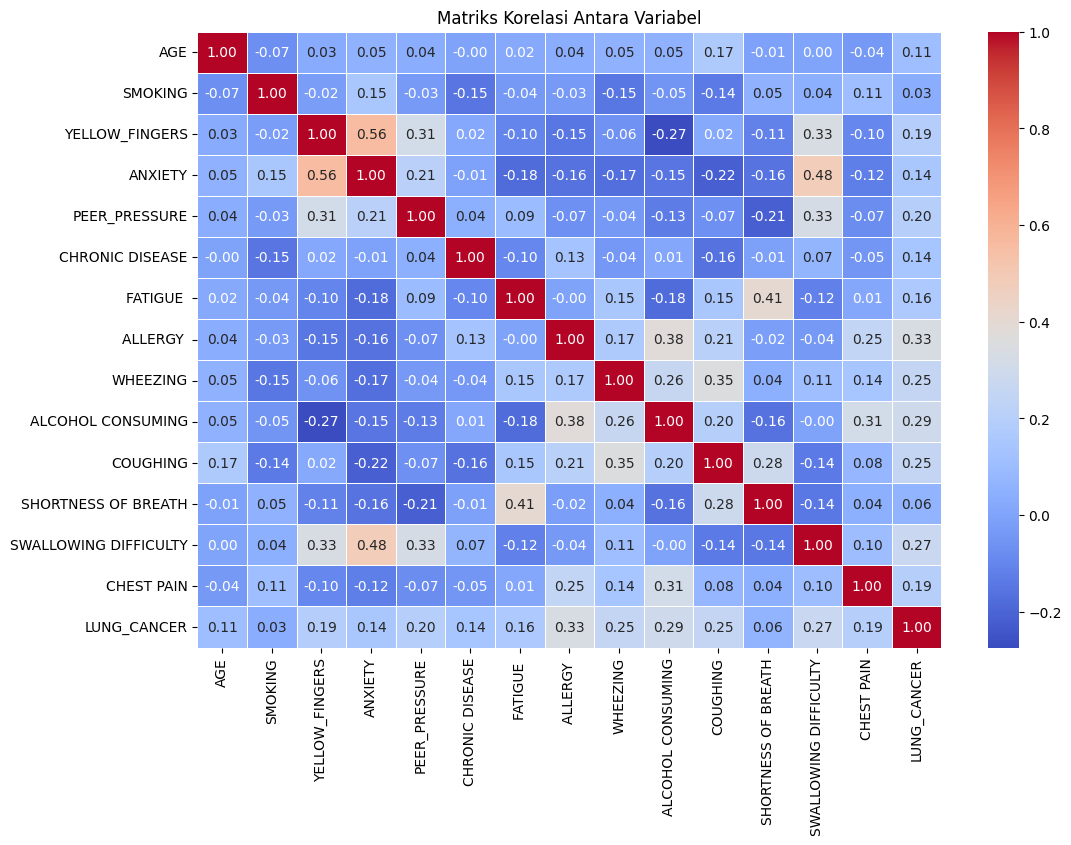

In [199]:
corr_matrix=df_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title("Matriks Korelasi Antara Variabel")

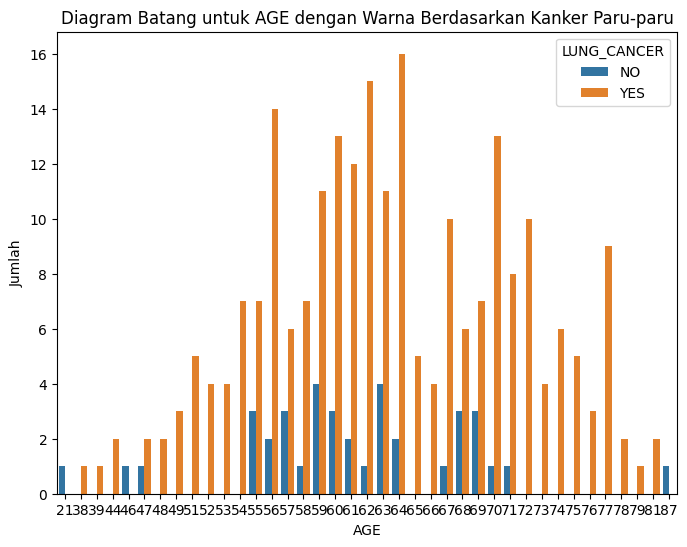

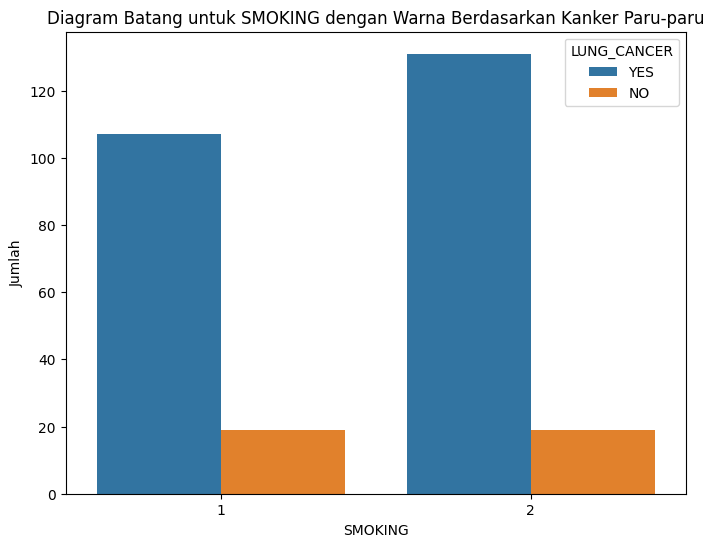

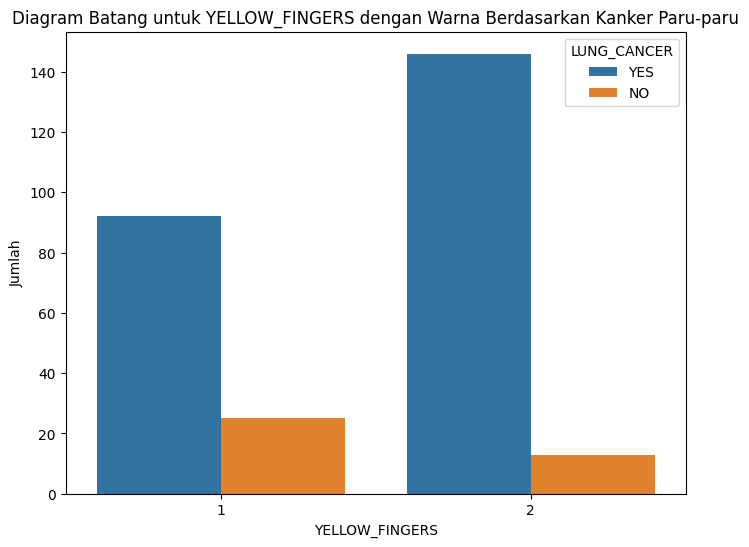

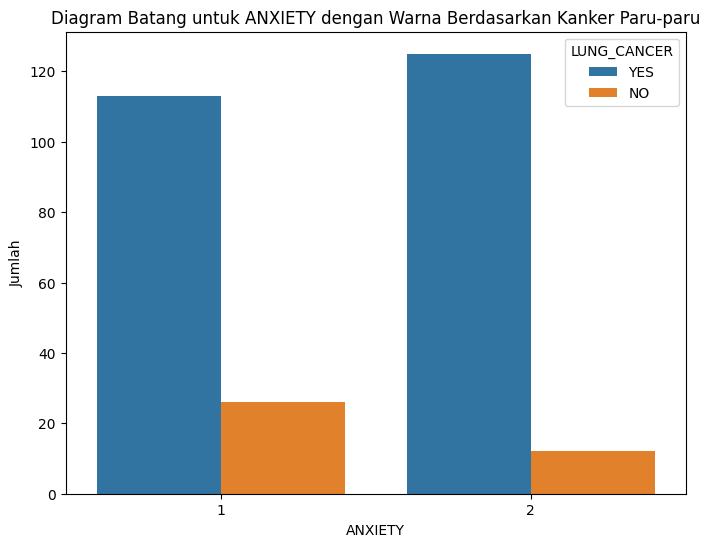

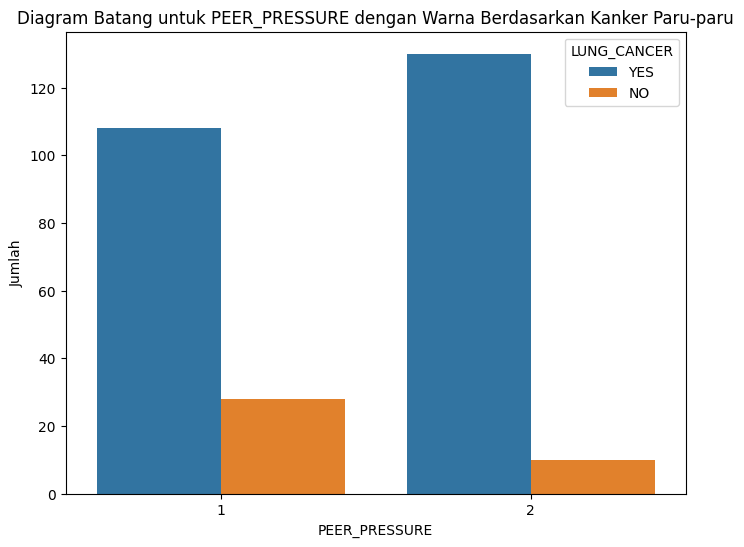

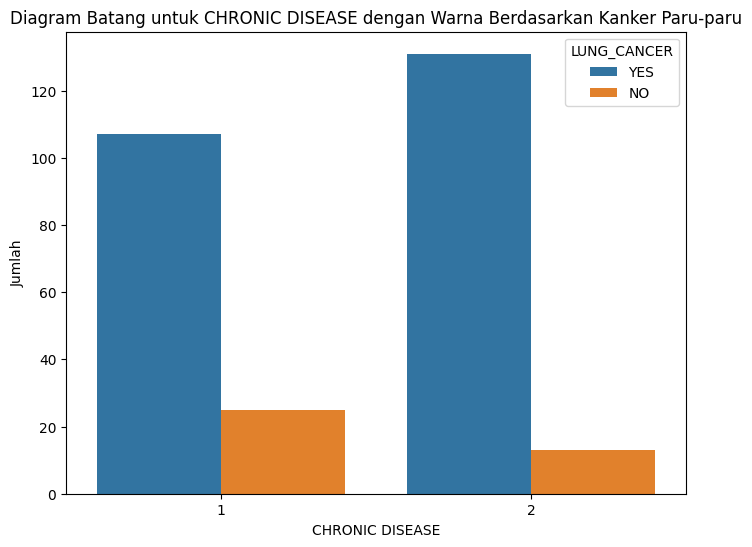

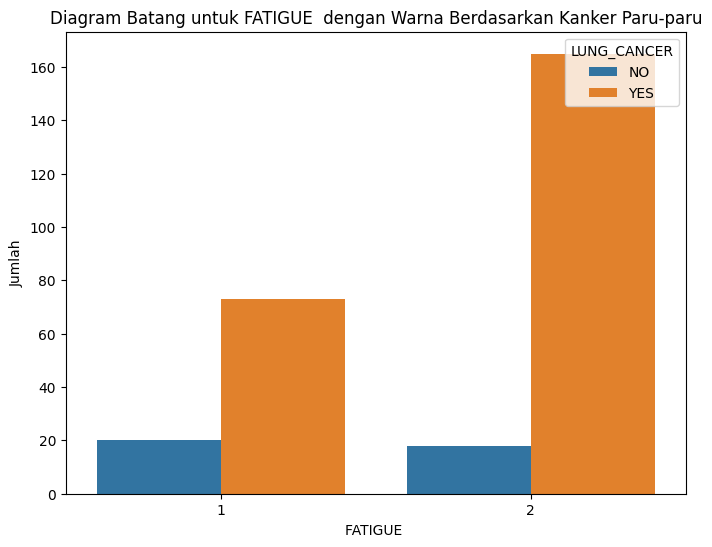

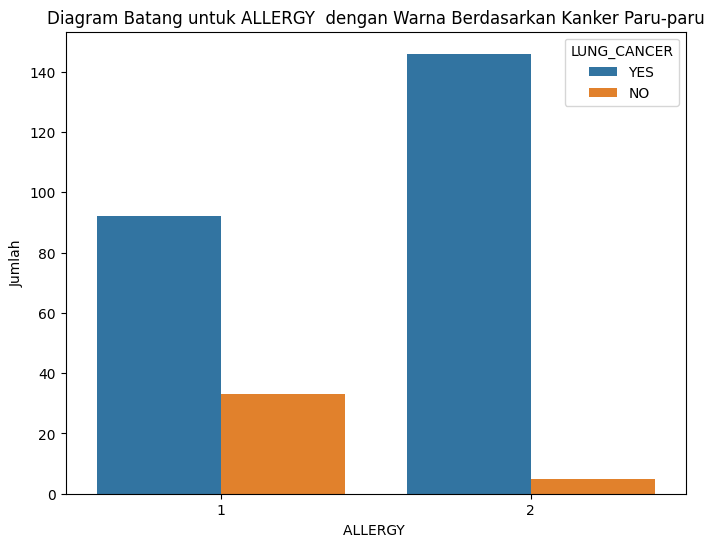

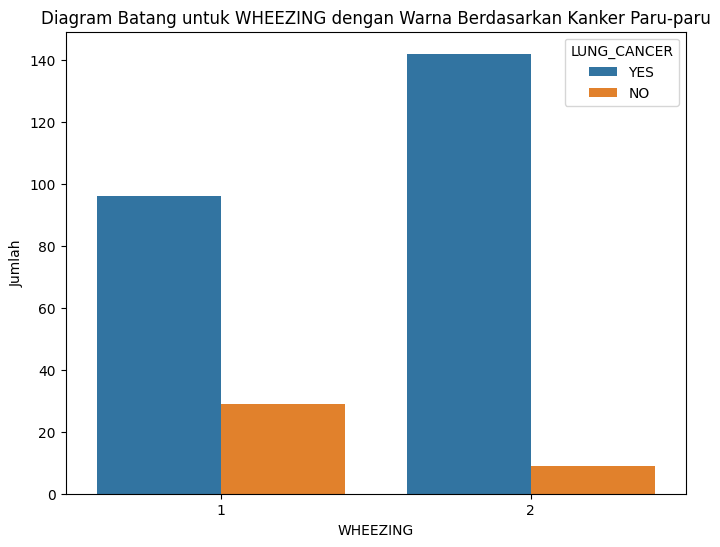

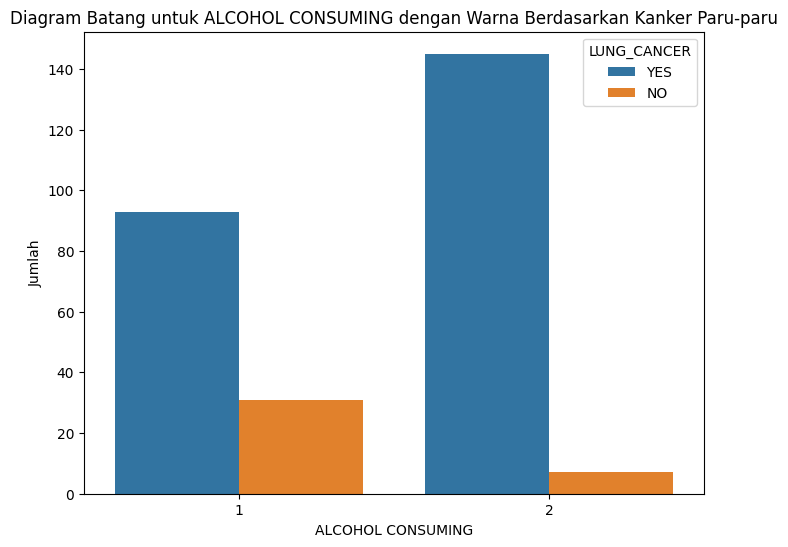

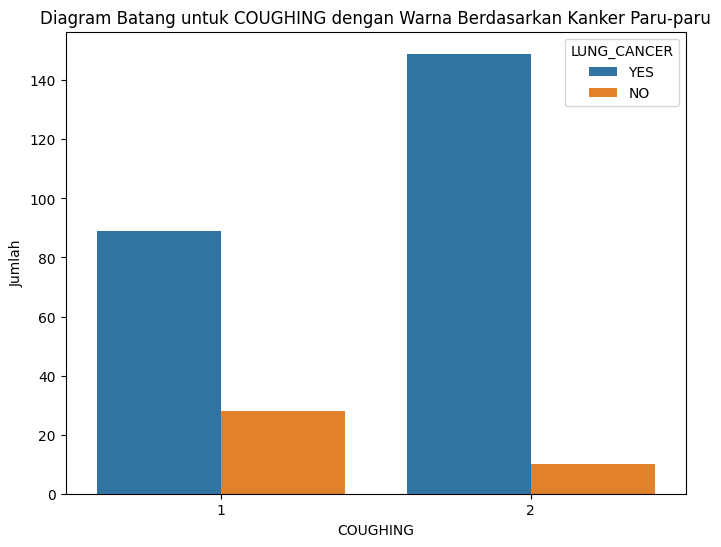

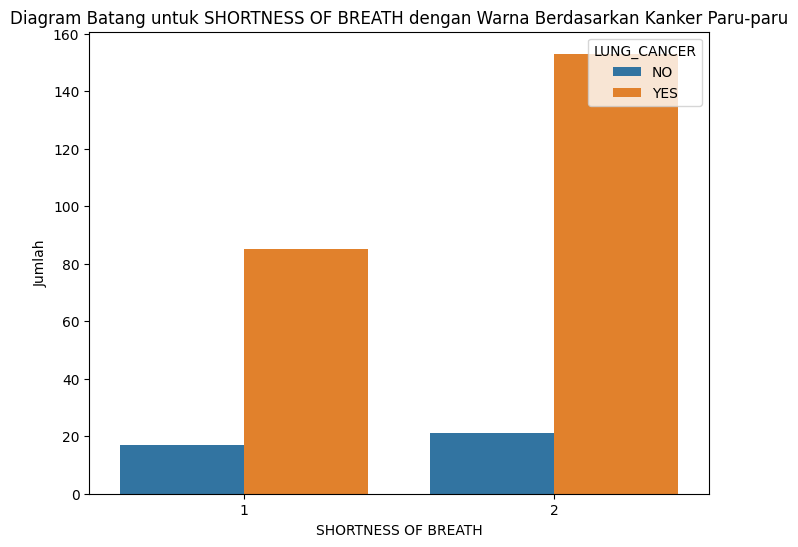

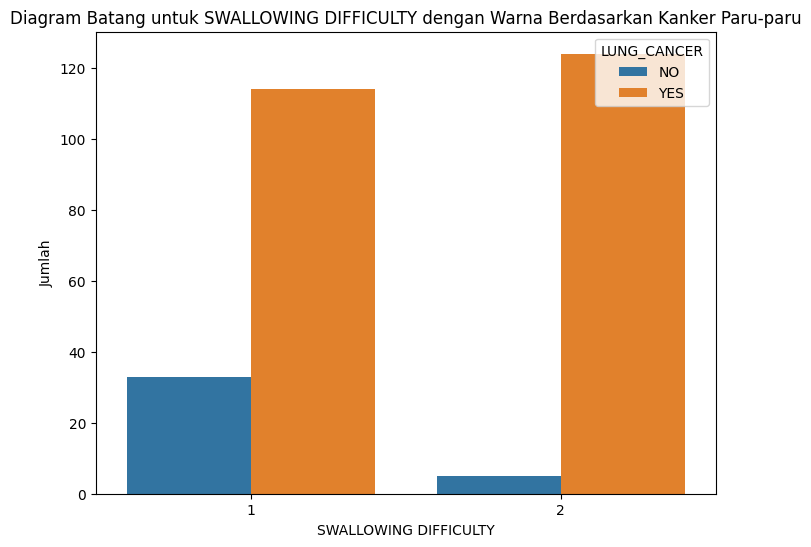

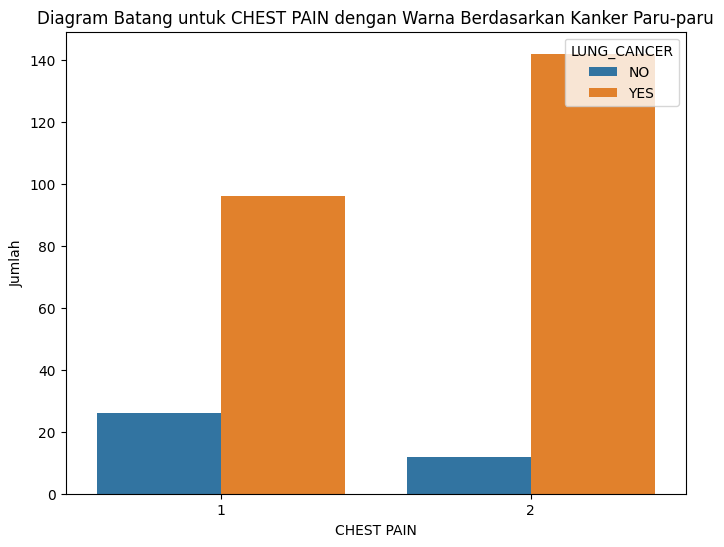

In [200]:
# Daftar atribut faktor risiko
risk_factors = ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
                'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                'SWALLOWING DIFFICULTY', 'CHEST PAIN']

# Membuat diagram batang untuk setiap atribut faktor risiko
for factor in risk_factors:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=factor, hue='LUNG_CANCER', data=df)
    plt.xlabel(factor)
    plt.ylabel('Jumlah')
    plt.title(f'Diagram Batang untuk {factor} dengan Warna Berdasarkan Kanker Paru-paru')
    plt.legend(title='LUNG_CANCER', loc='upper right')
    plt.show()


In [212]:
# Pisahkan atribut dan target
X = data  # Atribut
y = df['LUNG_CANCER']  # Target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Normalisasi atau standarisasi data fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definisikan daftar model yang akan digunakan
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

target_names = ['YES','NO']

# Latih dan evaluasi model-model tersebut
for name, model in models.items():
    print("Training", name)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    report = classification_report(y_test, y_pred, target_names=target_names)
    print("Classification Report for", name)
    print("")
    print(report)
    print()

Training Logistic Regression
Accuracy: 0.9285714285714286
Classification Report for Logistic Regression

              precision    recall  f1-score   support

         YES       1.00      0.67      0.80        12
          NO       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56


Training K-Nearest Neighbors
Accuracy: 0.8928571428571429
Classification Report for K-Nearest Neighbors

              precision    recall  f1-score   support

         YES       1.00      0.50      0.67        12
          NO       0.88      1.00      0.94        44

    accuracy                           0.89        56
   macro avg       0.94      0.75      0.80        56
weighted avg       0.91      0.89      0.88        56


Training Decision Tree
Accuracy: 0.8928571428571429
Classification Report for Decision Tree

              precision    recall  f1-sco